设置GPU（如果使用的是CPU可以忽略这步）

In [14]:
import tensorflow as tf

# 检查TensorFlow版本
print("TensorFlow版本:", tf.__version__)

# 兼容不同版本的GPU配置
try:
    # TensorFlow 2.4+ 的写法
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        gpu0 = gpus[0]
        tf.config.experimental.set_memory_growth(gpu0, True)
        tf.config.set_visible_devices([gpu0], 'GPU')
        print("GPU配置成功")
except AttributeError:
    # TensorFlow 2.0-2.3 的写法
    try:
        gpus = tf.config.experimental.list_physical_devices('GPU')
        if gpus:
            gpu0 = gpus[0]
            tf.config.experimental.set_memory_growth(gpu0, True)
            tf.config.experimental.set_visible_devices([gpu0], 'GPU')
            print("GPU配置成功（experimental API）")
    except:
        print("GPU配置失败，使用CPU")

TensorFlow版本: 1.14.0


导入数据

In [15]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


def load_mnist_local(local_path='mnist.npz'):
    """
    从本地文件加载MNIST数据集
    local_path: mnist.npz文件的路径
    """
    try:
        # 尝试从本地加载
        with np.load(local_path, allow_pickle=True) as f:
            train_images = f['x_train']
            train_labels = f['y_train']
            test_images = f['x_test']
            test_labels = f['y_test']
        print("从本地文件加载MNIST数据成功")
        return (train_images, train_labels), (test_images, test_labels)
    except FileNotFoundError:
        print(f"本地文件 {local_path} 未找到，尝试在线下载...")
        return datasets.mnist.load_data()
    except Exception as e:
        print(f"本地文件加载失败: {e}，尝试在线下载...")
        return datasets.mnist.load_data()

# 使用本地数据加载
(train_images, train_labels), (test_images, test_labels) = load_mnist_local()

本地文件加载失败: name 'np' is not defined，尝试在线下载...
11493376/11490434 [==============================] - 136s 12us/step


归一化

In [16]:
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images.shape,test_images.shape,train_labels.shape,test_labels.shape
"""
输出：((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))
"""

'\n输出：((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))\n'

可视化图片

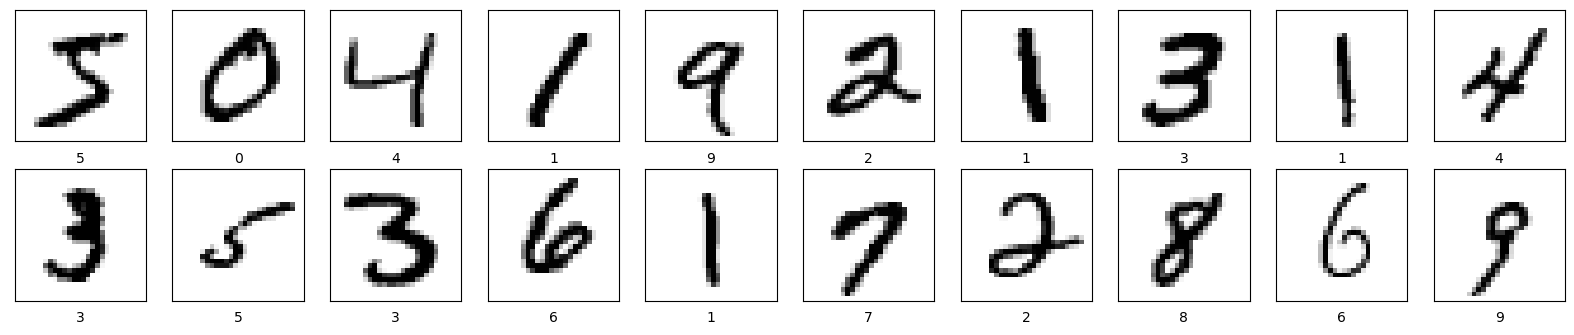

In [17]:
plt.figure(figsize=(20,10))
for i in range(20):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

调整图片格式

In [18]:
#调整数据到我们需要的格式
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

train_images.shape,test_images.shape,train_labels.shape,test_labels.shape
"""
输出：((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))
"""

'\n输出：((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))\n'

构建CNN网络模型

In [19]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),#卷积层1，卷积核3*3
    layers.MaxPooling2D((2, 2)),                   #池化层1，2*2采样
    layers.Conv2D(64, (3, 3), activation='relu'),  #卷积层2，卷积核3*3
    layers.MaxPooling2D((2, 2)),                   #池化层2，2*2采样
    
    layers.Flatten(),                              #Flatten层，连接卷积层与全连接层
    layers.Dense(64, activation='relu'),     #全连接层，特征进一步提取
    layers.Dense(10)                               #输出层，输出预期结果
])
# 打印网络结构
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
____

编译模型

In [20]:
"""
这里设置优化器、损失函数以及metrics
这三者具体介绍可参考我的博客：
https://blog.csdn.net/qq_38251616/category_10258234.html
"""
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

训练 模型

In [21]:
"""
这里设置输入训练数据集（图片及标签）、验证数据集（图片及标签）以及迭代次数epochs
关于model.fit()函数的具体介绍可参考我的博客：
https://blog.csdn.net/qq_38251616/category_10258234.html
"""
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 267us/sample - loss: 0.8370 - acc: 0.7241 - val_loss: 0.3810 - val_acc: 0.8867
Epoch 2/10
60000/60000 [==============================] - 16s 265us/sample - loss: 0.3251 - acc: 0.9010 - val_loss: 0.2557 - val_acc: 0.9245
Epoch 3/10
60000/60000 [==============================] - 16s 267us/sample - loss: 0.2334 - acc: 0.9293 - val_loss: 0.1773 - val_acc: 0.9469
Epoch 4/10
60000/60000 [==============================] - 20s 329us/sample - loss: 0.1736 - acc: 0.9482 - val_loss: 0.1420 - val_acc: 0.9589
Epoch 5/10
60000/60000 [==============================] - 20s 334us/sample - loss: 0.1357 - acc: 0.9599 - val_loss: 0.1182 - val_acc: 0.9657
Epoch 6/10
60000/60000 [==============================] - 20s 338us/sample - loss: 0.1150 - acc: 0.9652 - val_loss: 0.0959 - val_acc: 0.9709
Epoch 7/10
60000/60000 [==============================] - 21s 358us/sample - loss: 0.1004 - acc: 0.9694 

预测

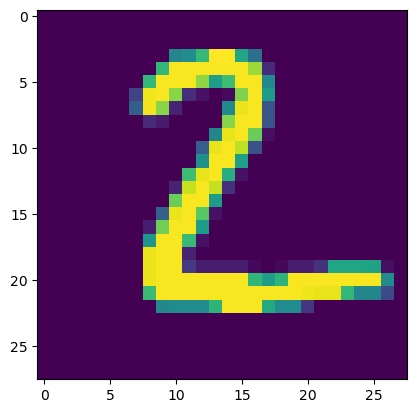

In [22]:
plt.imshow(test_images[1])

In [1]:
pre = model.predict(test_images)
pre[1]

NameError: name 'model' is not defined